In [1]:
import pandas as pd
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns 
import folium
from folium import Choropleth

In [2]:
# Rental History Data
one_bed_flat = pd.read_csv('../data/raw/rental_history/one_bed_flat.csv')
two_bed_flat = pd.read_csv('../data/raw/rental_history/two_bed_flat.csv')
three_bed_flat = pd.read_csv('../data/raw/rental_history/three_bed_flat.csv')
two_bed_house = pd.read_csv('../data/raw/rental_history/two_bed_house.csv')
three_bed_house = pd.read_csv('../data/raw/rental_history/three_bed_house.csv')
four_bed_house = pd.read_csv('../data/raw/rental_history/four_bed_house.csv')
all_properties = pd.read_csv('../data/raw/rental_history/all_properties.csv')

# Domain Rental Data
domain_one_bed_flat = pd.read_csv('../data/curated/domain_one_bed_flat_rent.csv')
domain_two_bed_flat = pd.read_csv('../data/curated/domain_two_bed_flat_rent.csv')
domain_three_bed_flat = pd.read_csv('../data/curated/domain_three_bed_flat_rent.csv')
domain_two_bed_house = pd.read_csv('../data/curated/domain_two_bed_house_rent.csv')
domain_three_bed_house = pd.read_csv('../data/curated/domain_three_bed_house_rent.csv')
domain_four_bed_house = pd.read_csv('../data/curated/domain_four_bed_house.csv')
domain_all_properties = pd.read_csv('../data/curated/domain_all_properties_rent.csv')

In [3]:
# Load Victoria suburbs shapefile for filtering
vic_suburbs_gdf = gpd.read_file('../data/map/Vic_Localities/gda2020_vicgrid/esrishape/whole_of_dataset/victoria/VMADMIN/LOCALITY_POLYGON.shp')
vic_suburbs_gdf = vic_suburbs_gdf.to_crs(epsg=4326)
vic_suburbs_gdf['suburb'] = vic_suburbs_gdf['GAZLOC'].str.lower()

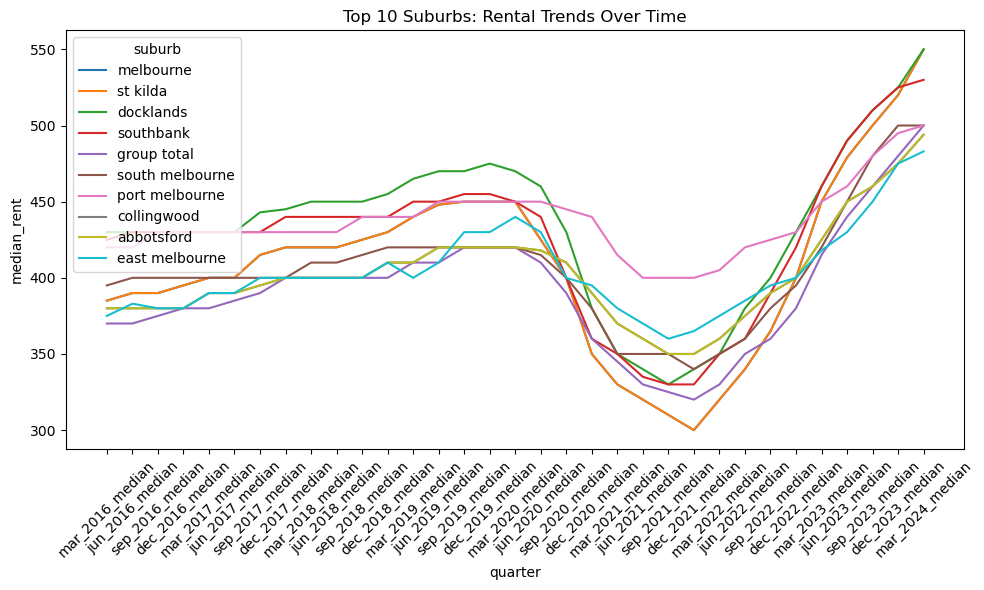

In [4]:
# Sort by the average rent and pick the top 10 suburbs
top_10_suburbs = one_bed_flat.sort_values(by='mar_2024_median', ascending=False).head(10)

# Melt the data for these top suburbs to visualize over time
top_10_melted = top_10_suburbs.melt(id_vars=['suburb'], var_name='quarter', value_name='median_rent')

# Plot the rental trends for top 10 suburbs
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_melted, x='quarter', y='median_rent', hue='suburb')
plt.xticks(rotation=45)
plt.title('Top 10 Suburbs: Rental Trends Over Time')
plt.tight_layout()
plt.show()


/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


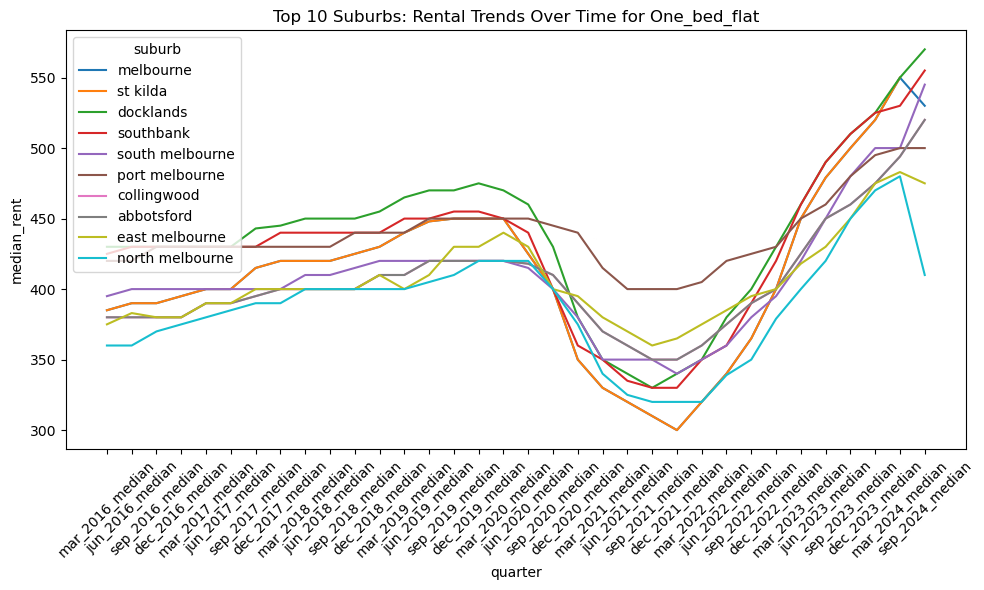

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


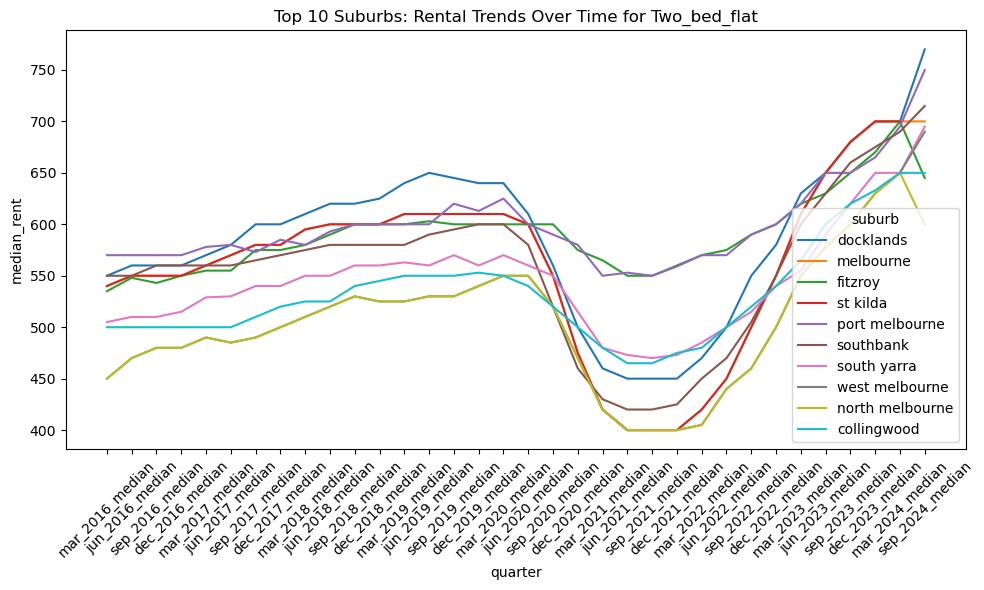

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


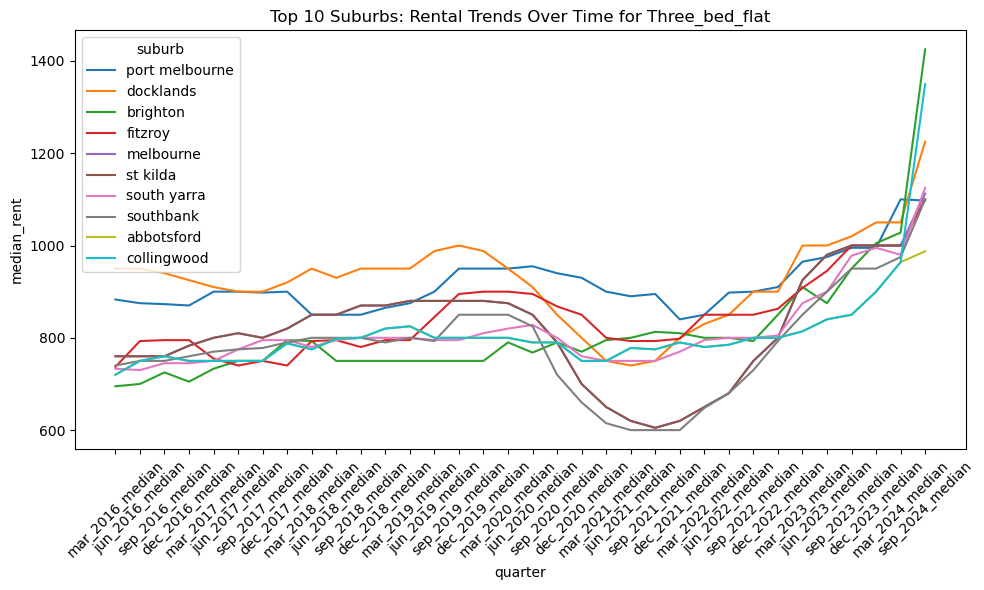

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


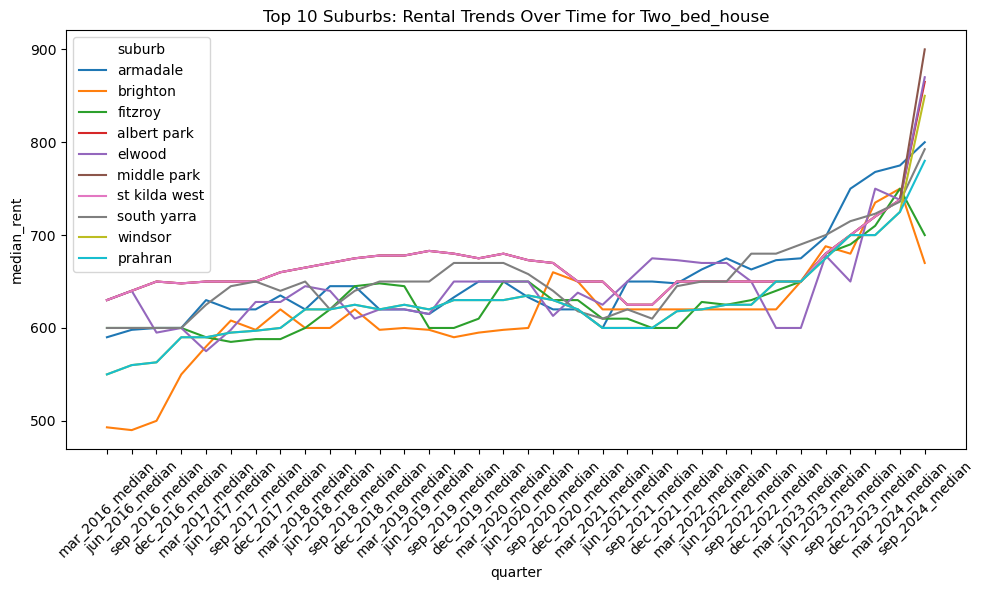

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


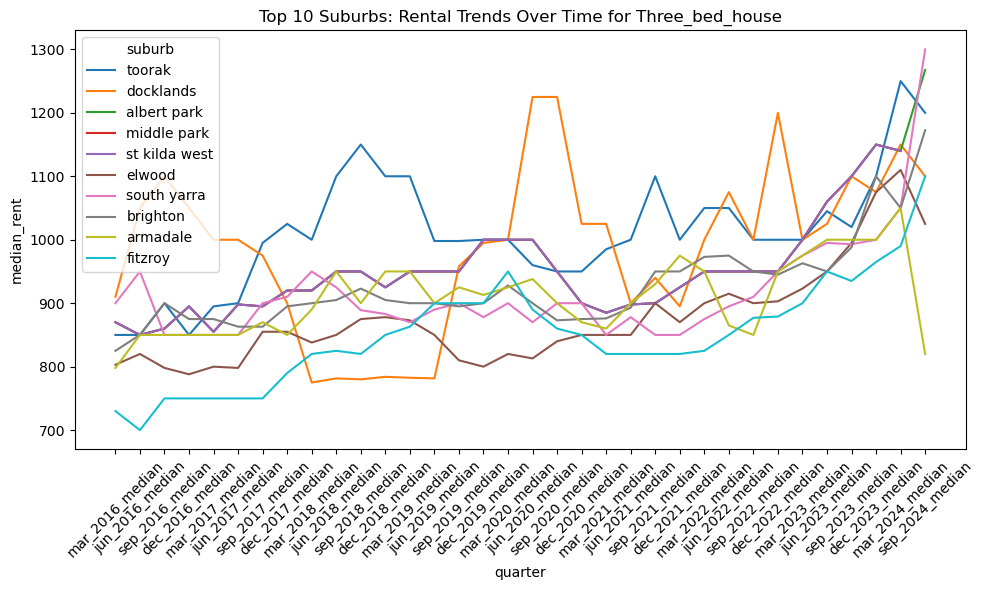

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


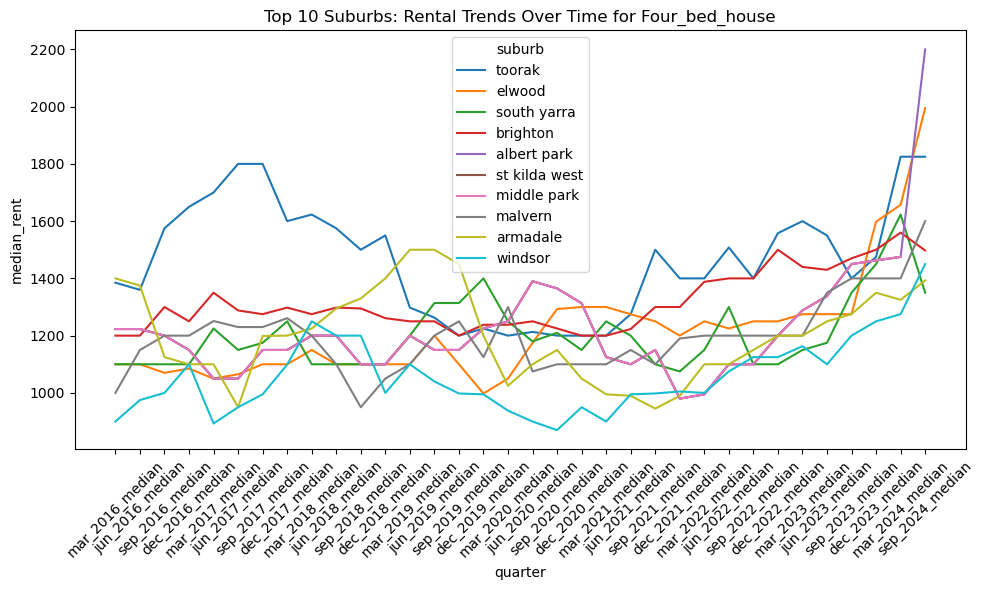

/var/folders/bz/yjywszk15kxc8d5vv73k9xcc0000gn/T/ipykernel_28711/258792634.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_data['suburb'] = rental_data['suburb'].str.lower()


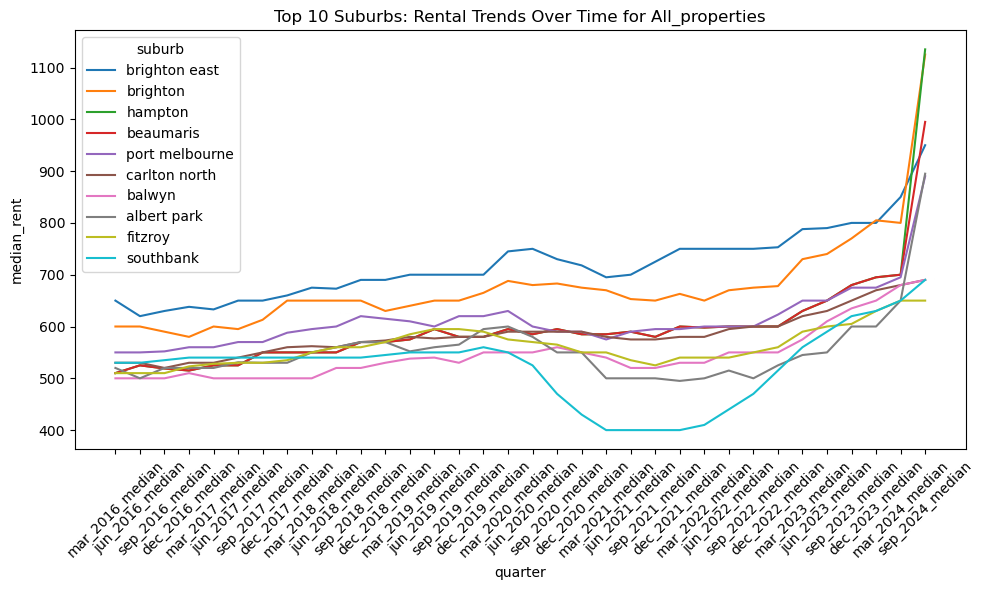

In [5]:
# List of different files and their domain counterparts (replace with actual filenames)
rental_files = {'one_bed_flat': one_bed_flat, 'two_bed_flat': two_bed_flat, 'three_bed_flat': three_bed_flat, 'two_bed_house': two_bed_house,
                'three_bed_house': three_bed_house, 'four_bed_house': four_bed_house, 'all_properties': all_properties}
domain_files = {'one_bed_flat': domain_one_bed_flat, 'two_bed_flat': domain_two_bed_flat, 'three_bed_flat': domain_three_bed_flat, 'two_bed_house': domain_two_bed_house,
                'three_bed_house': domain_three_bed_house, 'four_bed_house': domain_four_bed_house, 'all_properties': domain_all_properties}

# Iterate over each file and generate the plots
for file_name, rental_data in rental_files.items():
    
    # Remove 'group total'
    rental_data = rental_data[rental_data['suburb'].str.lower() != 'group total']
    
    # Merge with Domain data
    domain_data = domain_files[file_name]
    domain_data['suburb'] = domain_data['suburb'].str.lower()
    rental_data['suburb'] = rental_data['suburb'].str.lower()
    
    rental_data = rental_data.merge(domain_data[['suburb', 'median_rent']], on='suburb', how='left')
    rental_data.rename(columns={'median_rent': 'sep_2024_median'}, inplace=True)
    
    # Sort and melt data
    top_10_suburbs = rental_data.sort_values(by='mar_2024_median', ascending=False).head(10)
    top_10_melted = top_10_suburbs.melt(id_vars=['suburb'], var_name='quarter', value_name='median_rent')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=top_10_melted, x='quarter', y='median_rent', hue='suburb')
    plt.xticks(rotation=45)
    plt.title(f'Top 10 Suburbs: Rental Trends Over Time for {file_name.capitalize()}')
    plt.tight_layout()
    plt.show()


In [14]:
# Merge the domain rental data with the GeoDataFrame
merged_gdf = vic_suburbs_gdf.merge(domain_one_bed_flat, on='suburb', how='inner')

# Drop unnecessary columns (if not needed)
merged_gdf = merged_gdf.drop(columns=['PFI_CR', 'UFI_OLD', 'UFI_CR'], errors='ignore')

# Simplify geometries for faster map rendering (optional)
merged_gdf['geometry'] = merged_gdf['geometry'].simplify(0.001)  # Adjust tolerance as needed

# Create a Folium map centered at Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

# Add a Choropleth map, coloring the polygons based on the number of properties
choropleth = folium.Choropleth(
    geo_data=merged_gdf.to_json(),  # Convert to JSON format
    data=merged_gdf,  # Data containing the values to color by
    columns=['suburb', 'num_properties'],  # Columns for mapping
    key_on='feature.properties.suburb',  # Match the 'suburb' field from GeoDataFrame
    fill_color='YlOrRd',  # Color scale (can be changed)
    fill_opacity=0.6,  # Adjust the fill opacity
    line_opacity=0.4,  # Adjust the line opacity for better boundaries
    legend_name='Number of Properties'
).add_to(m)

# Add tooltips for each suburb (optional, based on median rent and num_properties)
for i, row in merged_gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        tooltip=folium.Tooltip(f"Suburb: {row['suburb'].capitalize()}<br>Median Rent: ${row['median_rent']}<br>Properties: {row['num_properties']}")
    ).add_to(m)

# Save the map to an HTML file
m.save("../plots/domain_one_bed_map.html")


In [17]:
# Merge the domain rental data with the GeoDataFrame
merged_gdf = vic_suburbs_gdf.merge(domain_four_bed_house, on='suburb', how='inner')

# Drop unnecessary columns (if not needed)
merged_gdf = merged_gdf.drop(columns=['PFI_CR', 'UFI_OLD', 'UFI_CR'], errors='ignore')

# Create a Folium map centered at Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

# Add a Choropleth map, coloring the polygons based on the number of properties
choropleth = folium.Choropleth(
    geo_data=merged_gdf.to_json(),  # Convert to JSON format
    data=merged_gdf,  # Data containing the values to color by
    columns=['suburb', 'num_properties'],  # Columns for mapping
    key_on='feature.properties.suburb',  # Match the 'suburb' field from GeoDataFrame
    fill_color='YlOrRd',  # Better color scale for value distinction
    fill_opacity=0.8,  # Increase opacity for better visibility
    line_opacity=0.1,  # Thinner lines for boundaries
    line_color='gray',  # Make boundaries a neutral color
    legend_name='Number of Properties',
    highlight=True  # Enable highlighting on hover
).add_to(m)

# Add tooltips for each suburb (optional, based on median rent and num_properties)
for i, row in merged_gdf.iterrows():
    folium.GeoJson(
        row['geometry'],
        tooltip=folium.Tooltip(f"Suburb: {row['suburb'].capitalize()}<br>Median Rent: ${row['median_rent']}<br>Properties: {row['num_properties']}")
    ).add_to(m)

# Save the map to an HTML file
m.save("../plots/domain_four_bed_house_map.html")

# To display the map in the notebook (optional)
# m
